<a href="https://colab.research.google.com/github/Emilianaalia/capstone-project-hacktiv8/blob/main/capstone-notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project: Student Mental Health Analysis

This project analyzes the mental health status of students using a publicly available dataset. It explores the relationship between stress, anxiety, depression, and lifestyle factors such as sleep, physical activity, diet, and academic performance.

### Objectives:
- Understand the distribution of mental health scores among students
- Discover possible correlations between mental health and lifestyle or academic factors
- Generate insights and recommendations using AI assistance (IBM Granite)

### Dataset:
- **Source:** [Student Mental Health Assessment Dataset](https://github.com/NidhiU-24/Student-Mental-Health-Assessment)
- **Entries:** 7000+ students
- **Features:** Age, Gender, CGPA, Stress Level, Sleep Quality, etc.

This project is part of the Hacktiv8 x IBM SkillsBuild capstone assignment.


In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/NidhiU-24/Student-Mental-Health-Assessment/main/students_mental_health_survey.csv"
data = pd.read_csv(url)
data.head()


,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         7010 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                7007 non-null   object 
 13  Counseling_Service

In [6]:
data = data.dropna()
data['CGPA'].fillna(data['CGPA'].mean(), inplace=True)
data['Substance_Use'].fillna('Unknown', inplace=True)

/tmp/ipython-input-6-3494059010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['CGPA'].fillna(data['CGPA'].mean(), inplace=True)
/tmp/ipython-input-6-3494059010.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

In [8]:
# Drop rows with missing values
data = data.dropna()

# Karena sudah dropna, kolom Substance_Use & CGPA seharusnya sudah tidak kosong lagi
# Tapi jika ingin pastikan tetap isi nilainya:
data['CGPA'] = data['CGPA'].fillna(data['CGPA'].mean())
data['Substance_Use'] = data['Substance_Use'].fillna('Unknown')


In [ ]:
!pip install langchain_community
!pip install replicate

In [11]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

In [12]:
data.info()
data.describe()
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 6995 entries, 0 to 7020
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          6995 non-null   int64  
 1   Course                       6995 non-null   object 
 2   Gender                       6995 non-null   object 
 3   CGPA                         6995 non-null   float64
 4   Stress_Level                 6995 non-null   int64  
 5   Depression_Score             6995 non-null   int64  
 6   Anxiety_Score                6995 non-null   int64  
 7   Sleep_Quality                6995 non-null   object 
 8   Physical_Activity            6995 non-null   object 
 9   Diet_Quality                 6995 non-null   object 
 10  Social_Support               6995 non-null   object 
 11  Relationship_Status          6995 non-null   object 
 12  Substance_Use                6995 non-null   object 
 13  Counseling_Service_Use 

,0
Age,0
Course,0
Gender,0
CGPA,0
Stress_Level,0
Depression_Score,0
Anxiety_Score,0
Sleep_Quality,0
Physical_Activity,0
Diet_Quality,0


In [ ]:
!pip install matplotlib seaborn


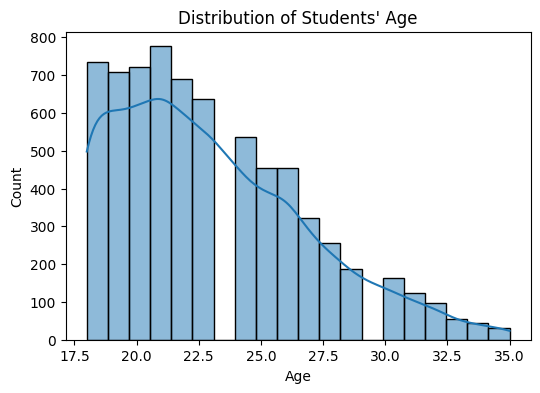

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Students\' Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


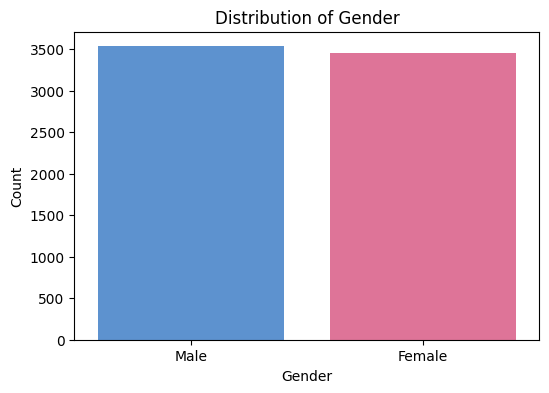

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', hue='Gender', data=data, palette={'Male': '#4A90E2', 'Female': '#F06292'},legend=False)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

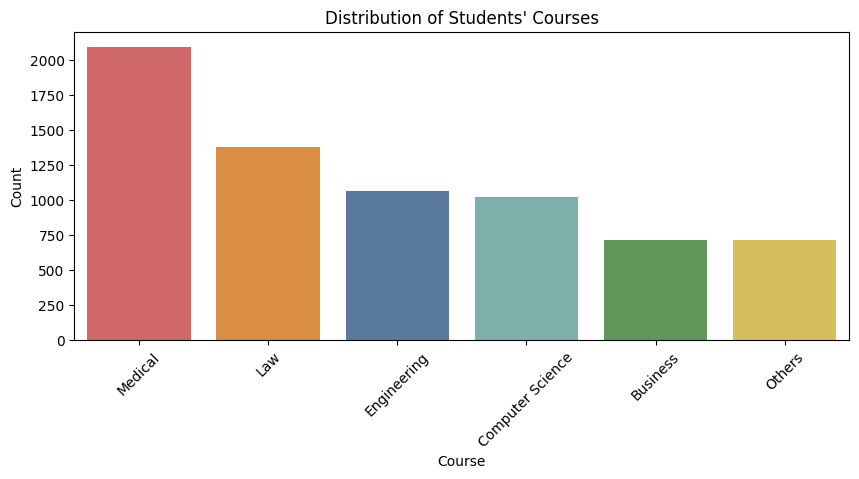

In [24]:
courses = data['Course'].value_counts().index.tolist()

custom_colors = ['#E15759', '#F28E2B','#4E79A7' , '#76B7B2', '#59A14F', '#EDC948', '#B07AA1' , '#FF9DA7']
palette = dict(zip(courses, custom_colors))

plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Course', order=courses, hue='Course', palette=palette, legend=False)
plt.title("Distribution of Students' Courses")
plt.xticks(rotation=45)
plt.xlabel('Course')
plt.ylabel('Count')
plt.show()

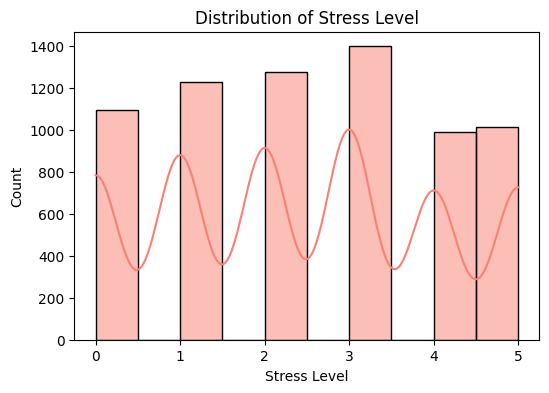

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(data['Stress_Level'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.show()